### helpers

In [ ]:
from collections import deque

import gym
import tensorflow as tf
from keras import backend as kb, layers, models


def dqn_loss(y_true, y_pred):
    mask = kb.one_hot(kb.argmax(y_true, axis=-1), 2)
    return kb.max(kb.square(y_true - y_pred) * mask, axis=-1)


def predict_action(observation):
    rewards = model.predict_on_batch(np.array([observation]))[0]
    return np.argmax(rewards)


def train_batch(batch):
    s_0, a, r_0, s_1, t = map(np.array, zip(*batch))

    r_n = model.predict_on_batch(s_1).max(axis=-1)
    r = r_0 + 0.9 * r_n * np.logical_not(t)

    y = np.eye(2)[a] * r[:,None]
    return model.train_on_batch(s_0, y)


### architecture

In [17]:
model = models.Sequential()

model.add(layers.Dense(units=32, 
                       input_shape=(4,), 
                       activation='elu'))

model.add(layers.Dense(units=2, 
                       activation='linear'))

model.compile(loss=dqn_loss, 
              optimizer='adam')

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


### training

In [18]:
game = gym.make('CartPole-v0')
memory = deque(maxlen=10000)
scores = []
epsilon = 1.0
loss = 0

for episode in range(200):
    observation = game.reset()
    scores.append(0)

    for step in range(200):
        epsilon = max(epsilon - 1e-4, 0.1)
        if random.random() < epsilon:
            action = random.randrange(2)
        else:
            action = predict_action(observation)

        next_observation, reward, done, *_ = game.step(action)
        scores[-1] += reward

        memory.append((observation, action, reward, next_observation, done))

        if len(memory) > 100:
            loss = train_batch(random.sample(memory, 32))

        observation = next_observation
        if done:
            break

    print("episode: {0:3d}, loss: {1:.2f}, score: {2:3.0f}"
          .format(episode, loss, scores[-1]))


[2017-08-08 18:07:21,174] Making new env: CartPole-v0


episode:   0, loss: 0.00, score:  18
episode:   1, loss: 0.00, score:  20
episode:   2, loss: 0.00, score:  25
episode:   3, loss: 0.00, score:  13
episode:   4, loss: 1.63, score:  31
episode:   5, loss: 1.58, score:  17
episode:   6, loss: 1.45, score:  16
episode:   7, loss: 1.59, score:  34
episode:   8, loss: 1.65, score:   8
episode:   9, loss: 1.89, score:  34
episode:  10, loss: 1.49, score:  46
episode:  11, loss: 1.53, score:  17
episode:  12, loss: 1.84, score:  23
episode:  13, loss: 2.38, score:  14
episode:  14, loss: 1.64, score:  22
episode:  15, loss: 1.49, score:  13
episode:  16, loss: 1.56, score:  25
episode:  17, loss: 2.13, score:  10
episode:  18, loss: 1.12, score:  20
episode:  19, loss: 1.07, score:  13
episode:  20, loss: 3.73, score:  37
episode:  21, loss: 1.18, score:  15
episode:  22, loss: 0.41, score:  18
episode:  23, loss: 0.39, score:  18
episode:  24, loss: 1.73, score:  16
episode:  25, loss: 1.39, score:  11
episode:  26, loss: 2.16, score:  16
e

### performance

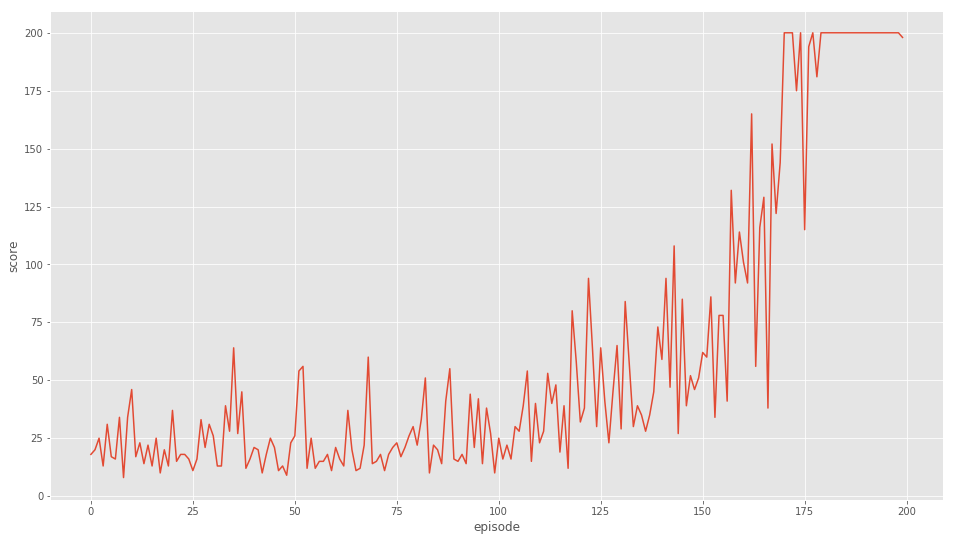

In [19]:
plt.rcParams["figure.figsize"] = [16, 9]
plt.plot(scores)
plt.xlabel('episode')
plt.ylabel('score')
plt.show()
